In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Load AI-enhanced dataset
df = pd.read_csv("../data/llm_summaries_output.csv")

# Preview structure
df.head()

ticker  prev_close    open  gap_pct                   timestamp    rsi  \
0   NVDA      158.24  159.33     0.69  2025-07-08T14:42:14.568269  74.44   
1   TSLA      293.94  296.88     1.00  2025-07-08T14:42:14.747683  38.32   
2   AAPL      209.95  210.13     0.09  2025-07-08T14:42:15.020752  70.79   
3    AMD      134.80  137.34     1.88  2025-07-08T14:42:15.170424  66.30   
4   MSFT      497.72  497.41    -0.06  2025-07-08T14:42:15.348097  69.06   

   rel_volume  dist_from_5d_high  dist_from_5d_low  \
0        0.74              -0.62              5.60   
1        0.87              -6.45              3.16   
2        0.59              -2.88              1.88   
3        0.82              -1.78              3.18   
4        0.53              -0.72              1.60   

                                         llm_summary  
0  1. Technically, NVDA is showing a slight gap u...  
1  1. Technically, TSLA has gapped up by 1.0% but...  
2  1. Technically, AAPL is showing a minor gap up...  
3  1. Technically, AMD is showing some bullish si...  
4  1. Technically, Microsoft (MSFT) is showing a ...

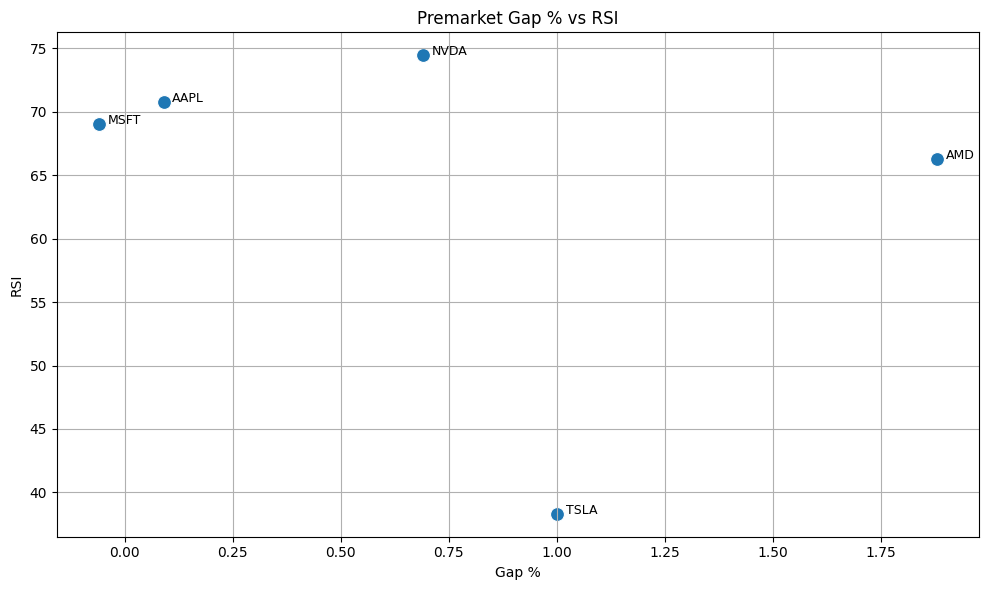

In [2]:
#  Visualize how much each stock is gapping up/down (Gap %) vs. technical momentum (RSI)
# - Gap % on X-axis: how much the stock moved from yesterday’s close to today’s open
# - RSI on Y-axis: momentum indicator showing whether the stock is overbought (>70) or oversold (<30)
# - This scatter plot helps identify:
#     • Momentum breakouts (high gap %, high RSI)
#     • Potential reversals (high gap %, low RSI)
#     • Hidden divergences or quiet setups

# Plot Gap % vs RSI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="gap_pct", y="rsi", s=100)

# Annotate tickers
for _, row in df.iterrows():
    plt.text(row["gap_pct"] + 0.02, row["rsi"], row["ticker"], fontsize=9)

plt.title("Premarket Gap % vs RSI")
plt.xlabel("Gap %")
plt.ylabel("RSI")
plt.grid(True)
plt.tight_layout()
plt.show()

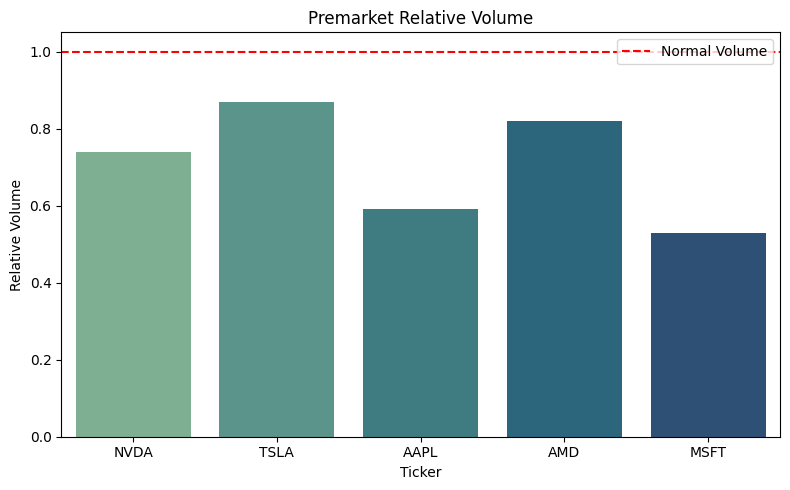

In [3]:
# Show which stocks have unusually high volume this morning (i.e., which ones are “in play”).

# Barplot: Relative Volume by Ticker
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="ticker", y="rel_volume", palette="crest")
plt.title("Premarket Relative Volume")
plt.ylabel("Relative Volume")
plt.xlabel("Ticker")
plt.axhline(1.0, color="red", linestyle="--", label="Normal Volume")
plt.legend()
plt.tight_layout()
plt.show()

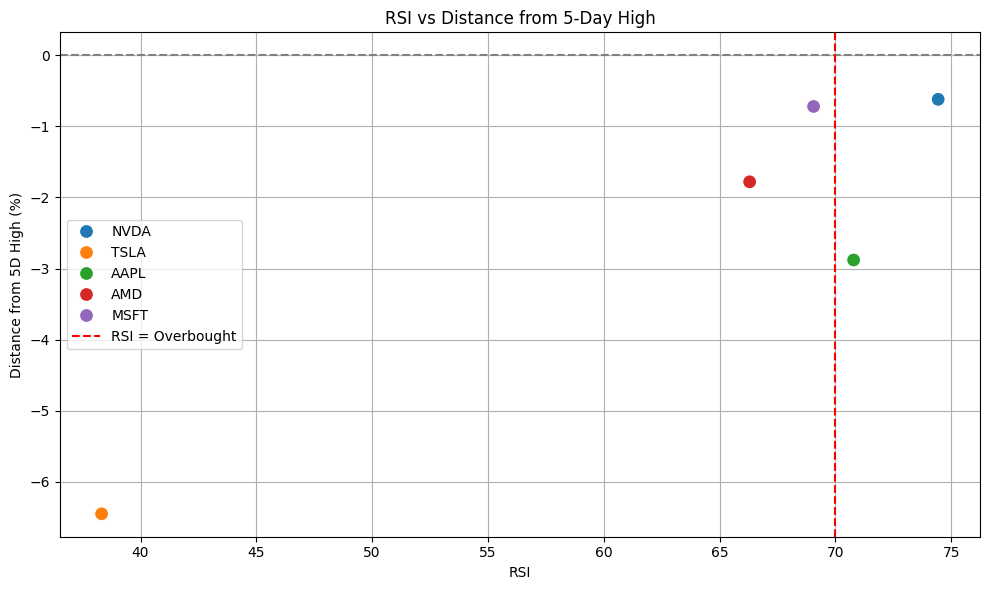

In [4]:
# Reveals how “overbought” a stock is and how close it is to recent highs.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="rsi", y="dist_from_5d_high", hue="ticker", s=100)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(70, color="red", linestyle="--", label="RSI = Overbought")

plt.title("RSI vs Distance from 5-Day High")
plt.xlabel("RSI")
plt.ylabel("Distance from 5D High (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()